In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import utils as utils


In [5]:
cc = pd.read_csv('./data/continued_claims_by_state.csv', parse_dates = ['index'], index_col = 'index')
ic = pd.read_csv('./data/initial_claims_by_state.csv', parse_dates = ['index'], index_col = 'index')
cur = pd.read_csv('./data/continued_unemployment_rate_by_state.csv', parse_dates = ['index'], index_col = 'index')
iur = pd.read_csv('./data/initial_unemployment_rate_by_state.csv', parse_dates = ['index'], index_col = 'index')

# Macro perspective

#### Initial Claims

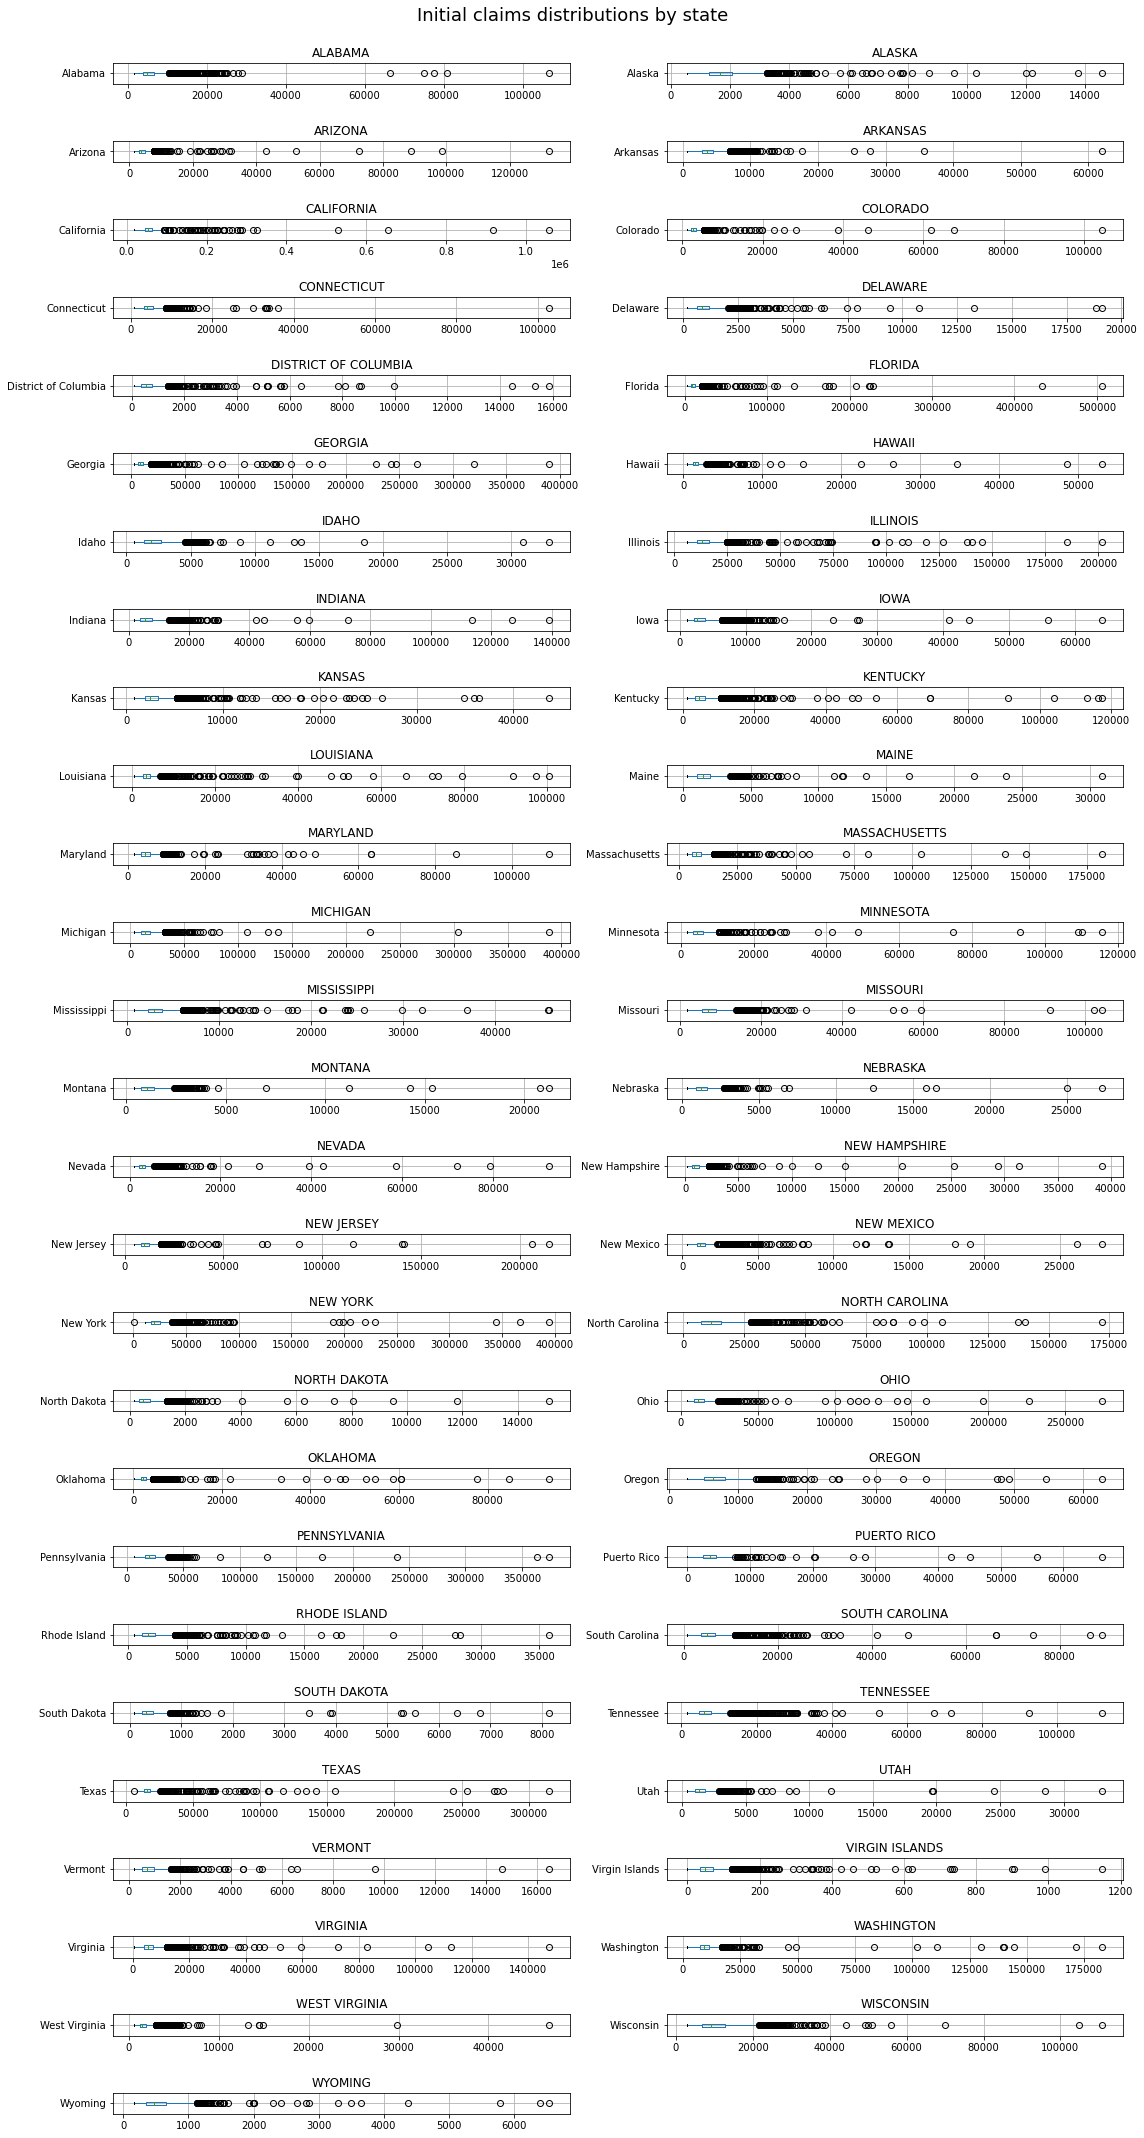

In [8]:
utils.sub_box_plot(ic, 'Initial claims distributions by state')

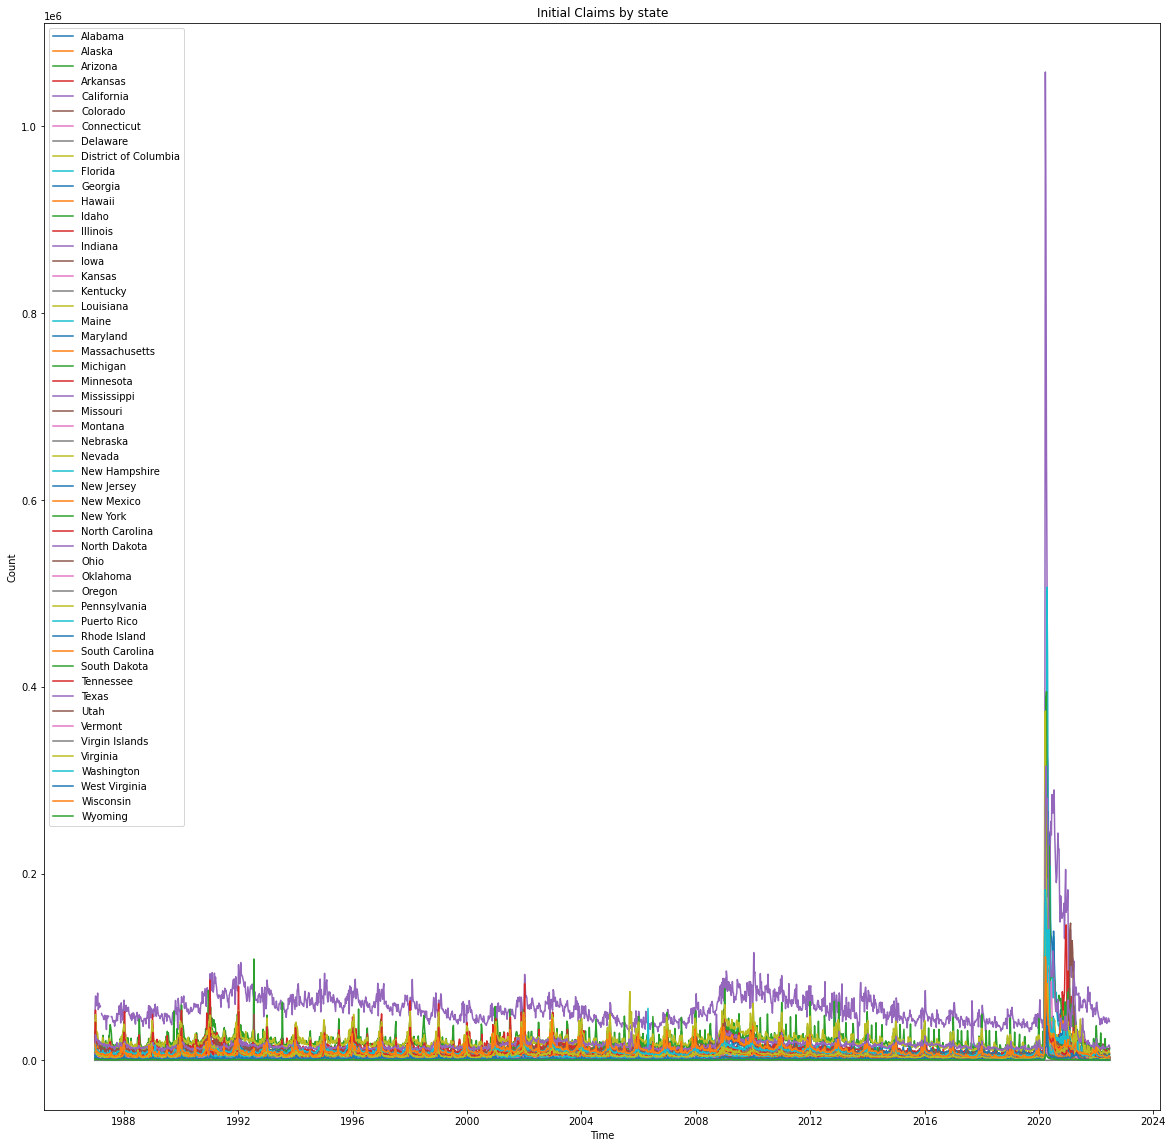

In [9]:
utils.line_plot(ic, 'Initial Claims by state', xlabels = 'Time', ylabels = 'Count')

#### Continued Claims

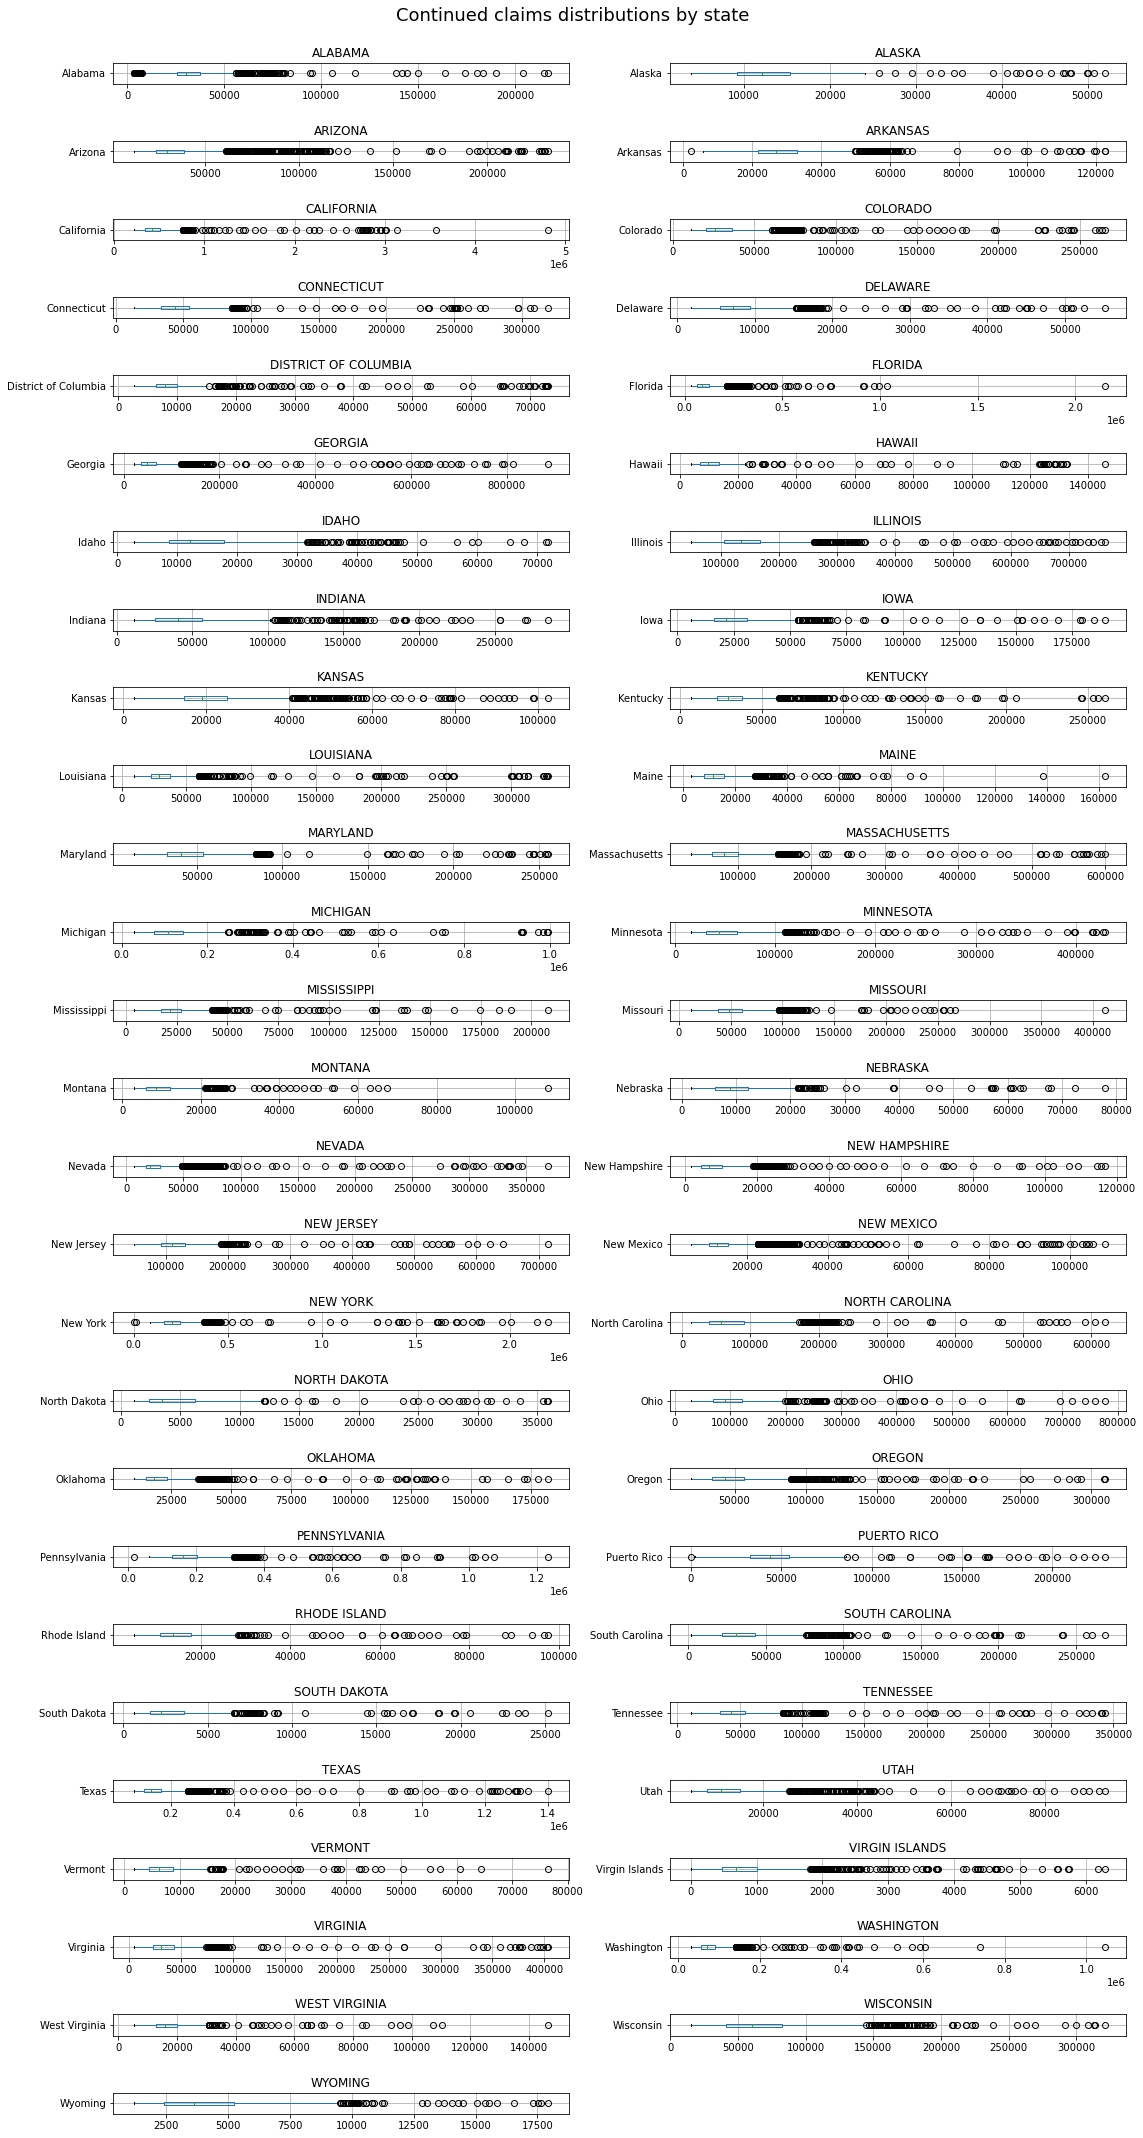

In [10]:
utils.sub_box_plot(cc, 'Continued claims distributions by state')

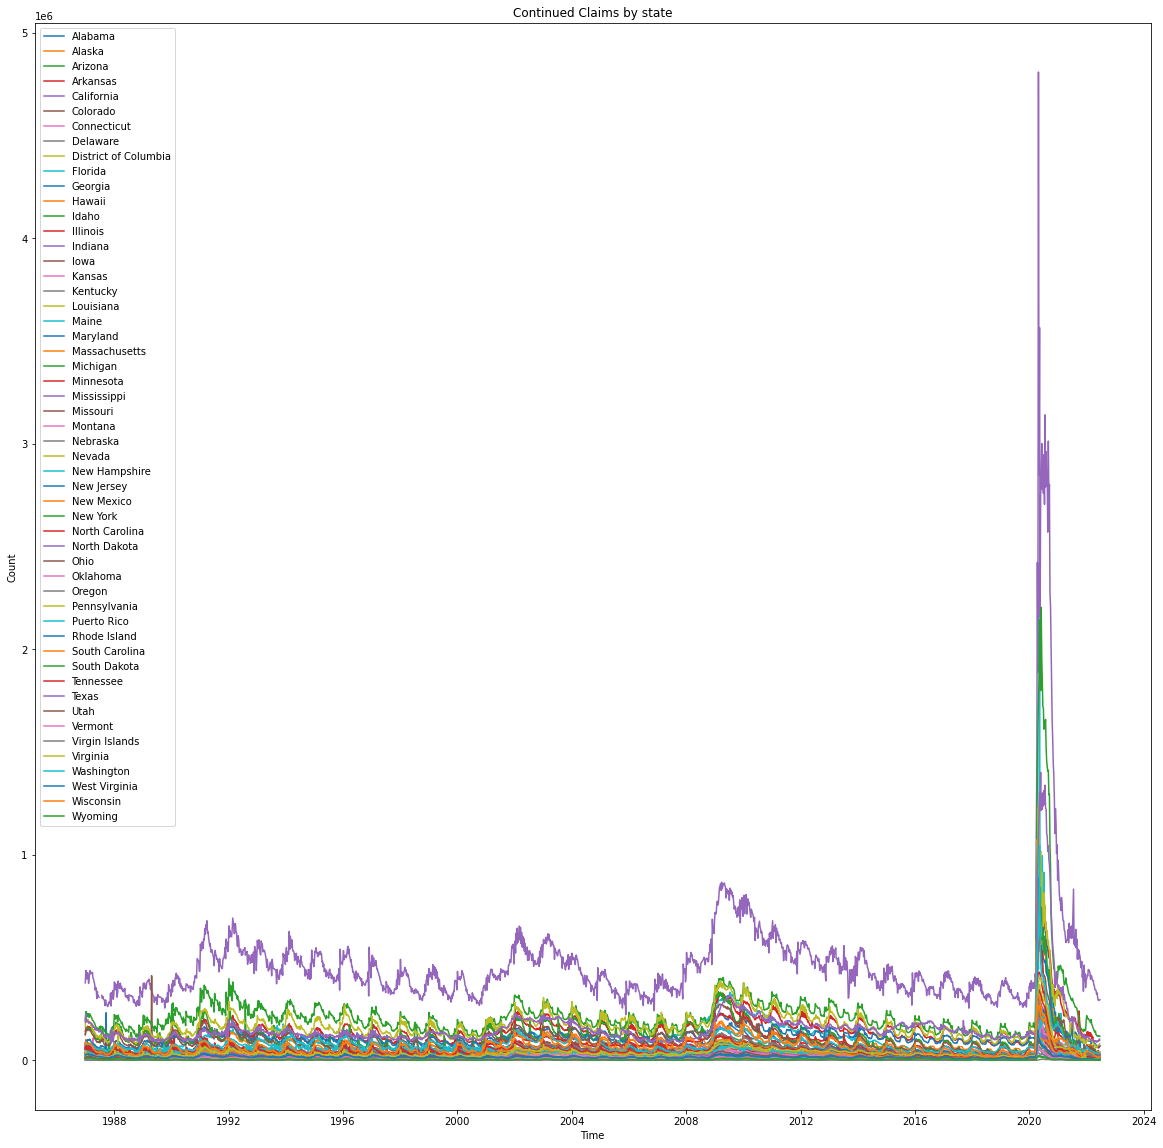

In [11]:
utils.line_plot(cc, 'Continued Claims by state', xlabels = 'Time', ylabels = 'Count')

#### Continued unemployment rate

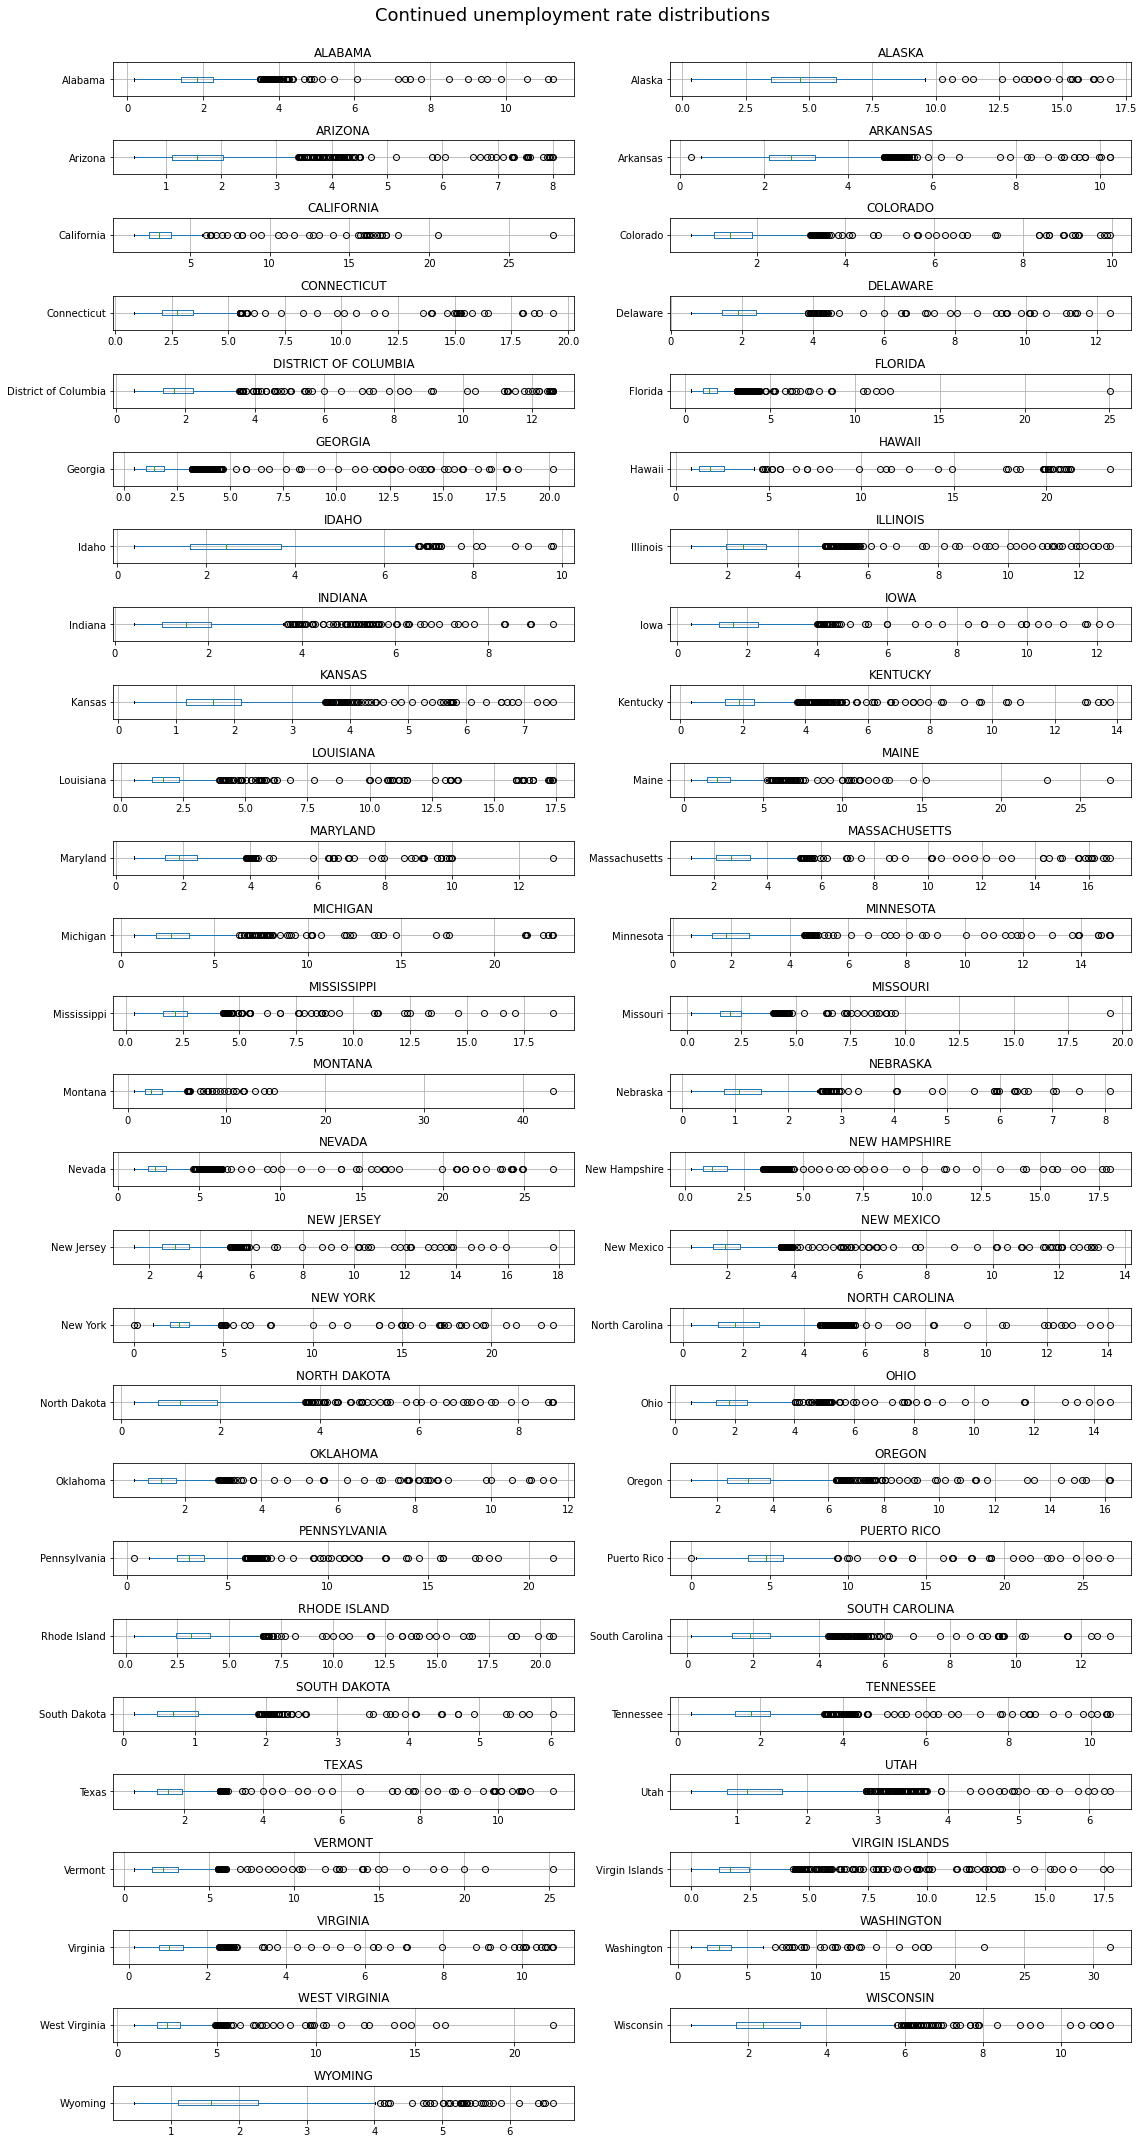

In [21]:
utils.sub_box_plot(cur, 'Continued unemployment rate distributions')

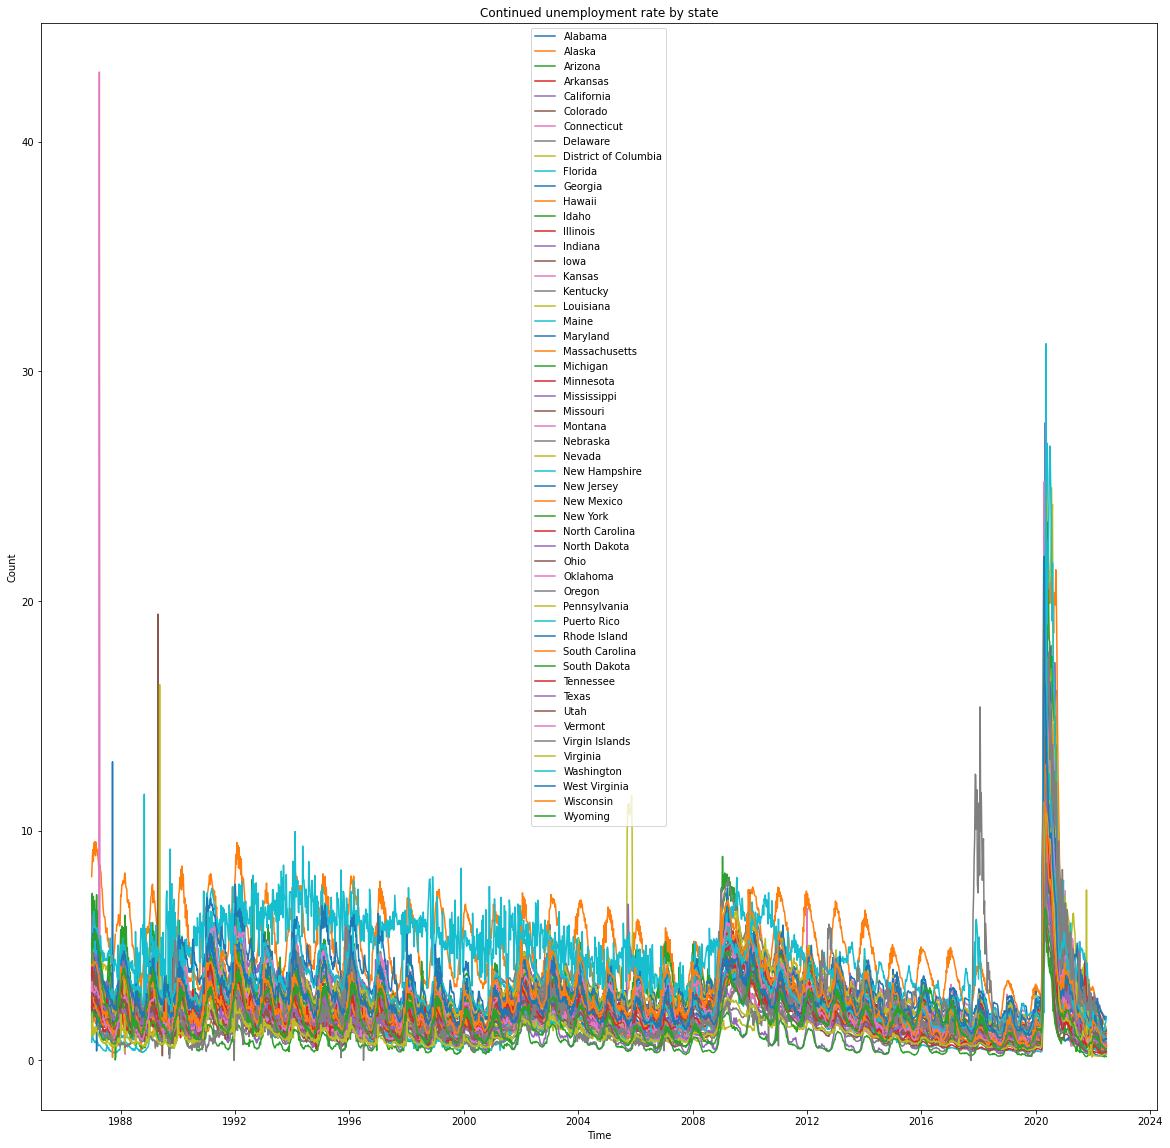

In [22]:
utils.line_plot(cur, 'Continued unemployment rate by state', xlabels = 'Time', ylabels = 'Count')

#### Insured Unemployment Rate

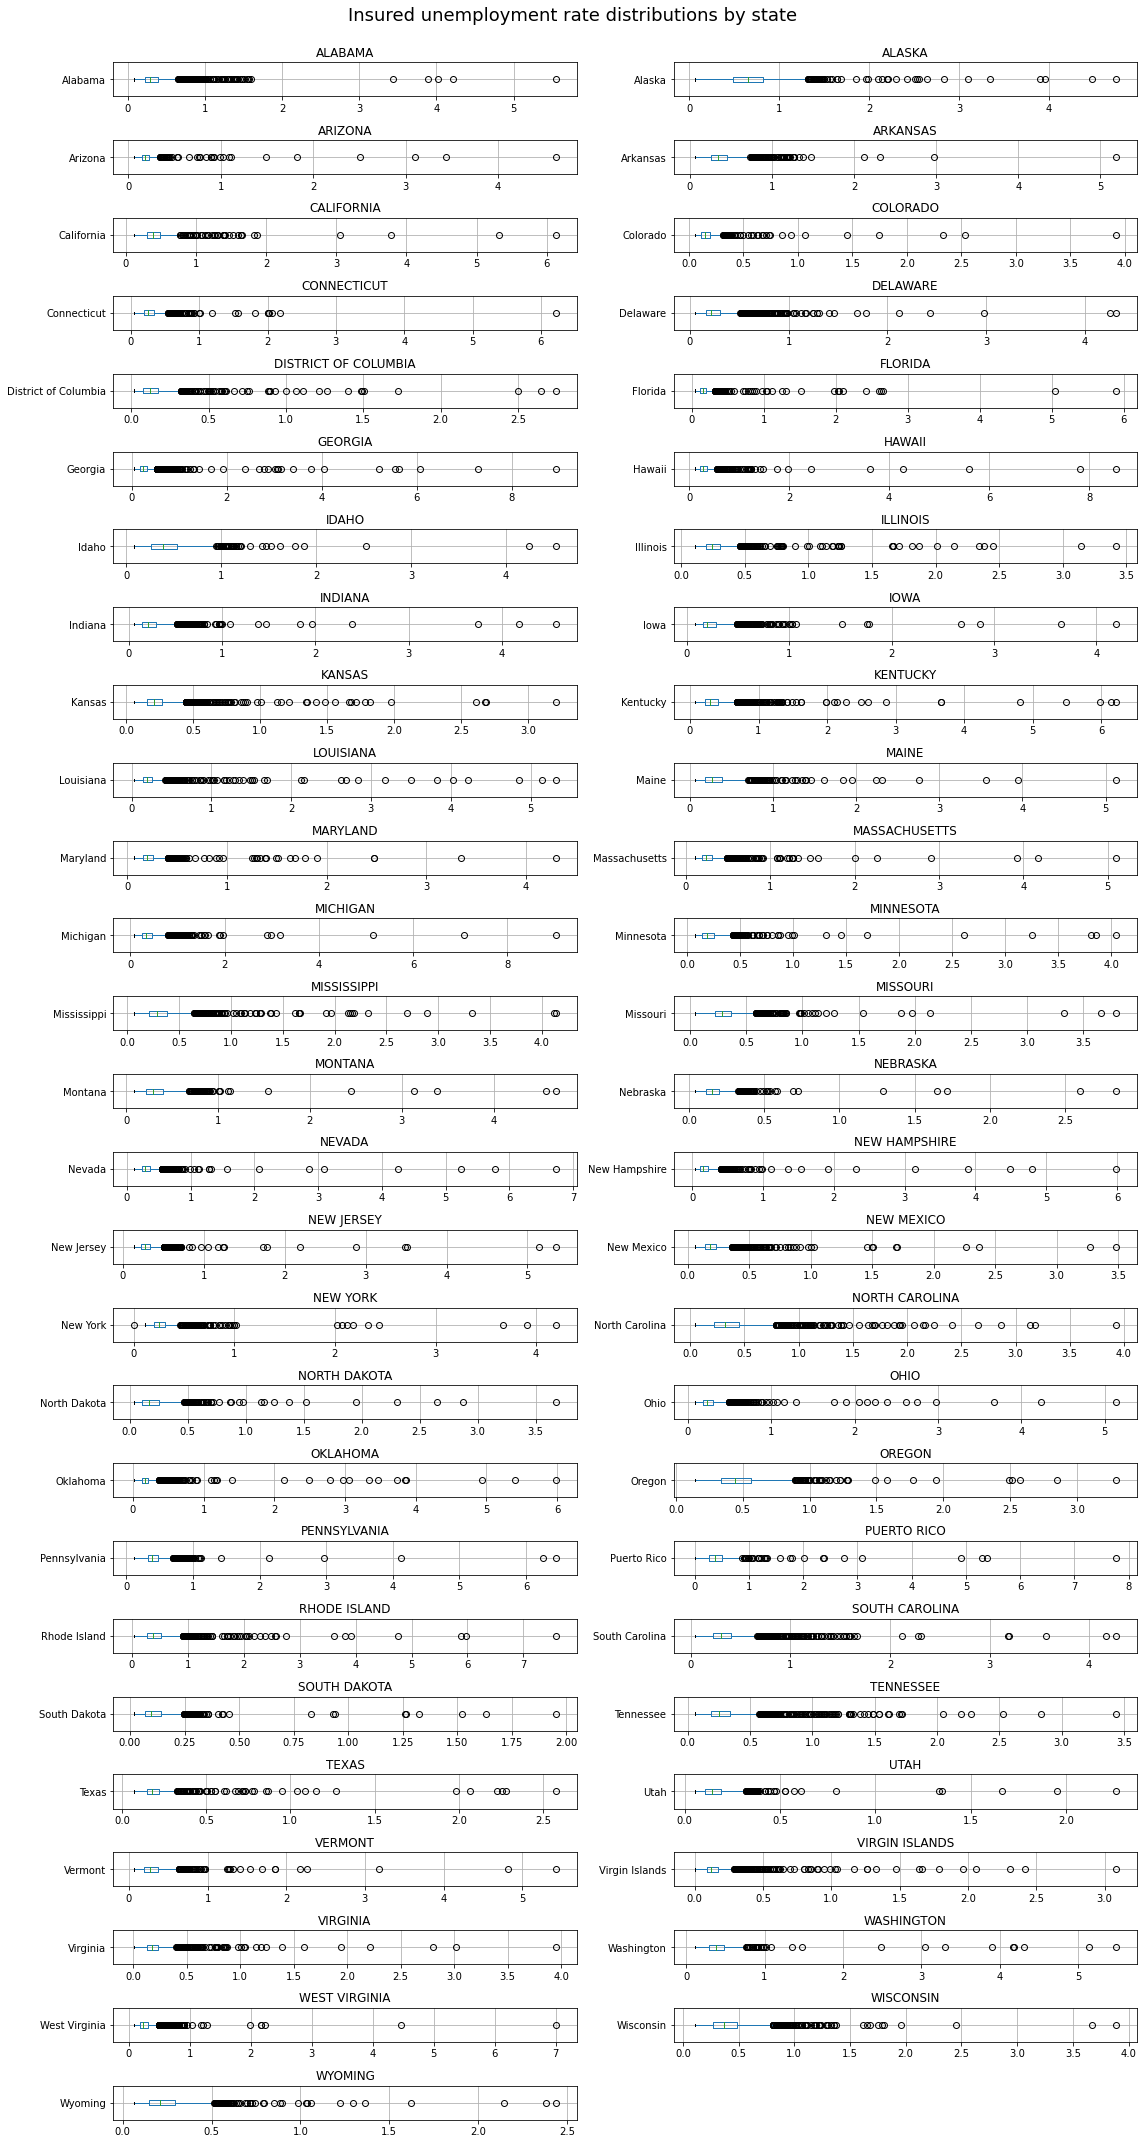

In [23]:
utils.sub_box_plot(iur, 'Insured unemployment rate distributions by state')

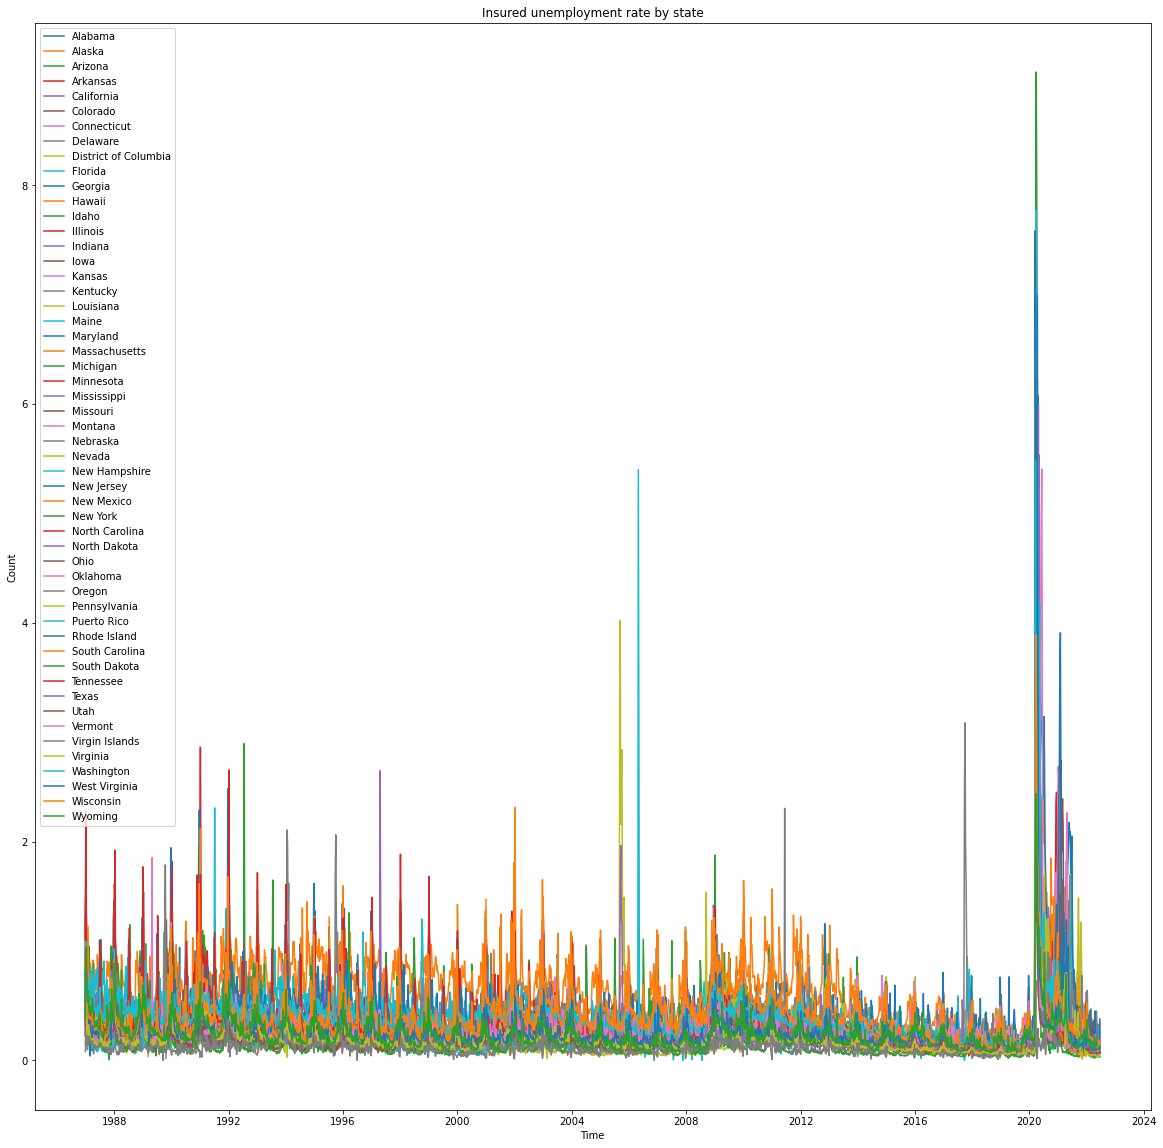

In [24]:
utils.line_plot(iur, 'Insured unemployment rate by state', xlabels = 'Time', ylabels = 'Count')

# Closer investigation

Choosing which states to look into closely by identifying which states appear as the top 5 for each metric

In [25]:
def top_5(df, title):
    
    top = df.mean().sort_values(ascending = False)[:5]

    col = list(top.index)
    

    return pd.DataFrame(col, columns = [title])

## top 5 states that have the highest rate for each unemployment insurance issue (percap)

- initial claims
- continued claims
- covered employment
- insured unemployment rate

In [29]:
#ranked top to bottom
top = top_5(ic, 'initial_claims').join(top_5(cc, 'continued_claims'))
top


,initial_claims,continued_claims
0,California,California
1,New York,New York
2,Pennsylvania,Pennsylvania
3,Texas,Texas
4,Michigan,Illinois


In [32]:
#the states with the most frequent appearances as the top for each metric
the_chosen_ones = ['California', 'New York']

# Initial Claims with top 2 states

**Findings:** The spike found in the line plot can be attributed to the financial relief provided by the government as people newly lost their jobs during covid. Stationarity is achieved with 1 difference. Data from 2020 drastically skews the distribution of initial clames. Autocorrelation shows some signs of seasonality but the partial autocorrelation indicates otherwise.

             count          mean           std      min       25%      50%  \
California  1847.0  60376.881429  44531.278874  18046.0  45143.00  54370.0   
New York    1852.0  23591.153888  20071.264501    481.0  16833.25  19955.5   

                 75%        max  
California  64361.50  1058325.0  
New York    24781.75   394701.0  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1852 entries, 1986-12-27 to 2022-06-18
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   California  1847 non-null   float64
 1   New York    1852 non-null   float64
dtypes: float64(2)
memory usage: 43.4 KB
None



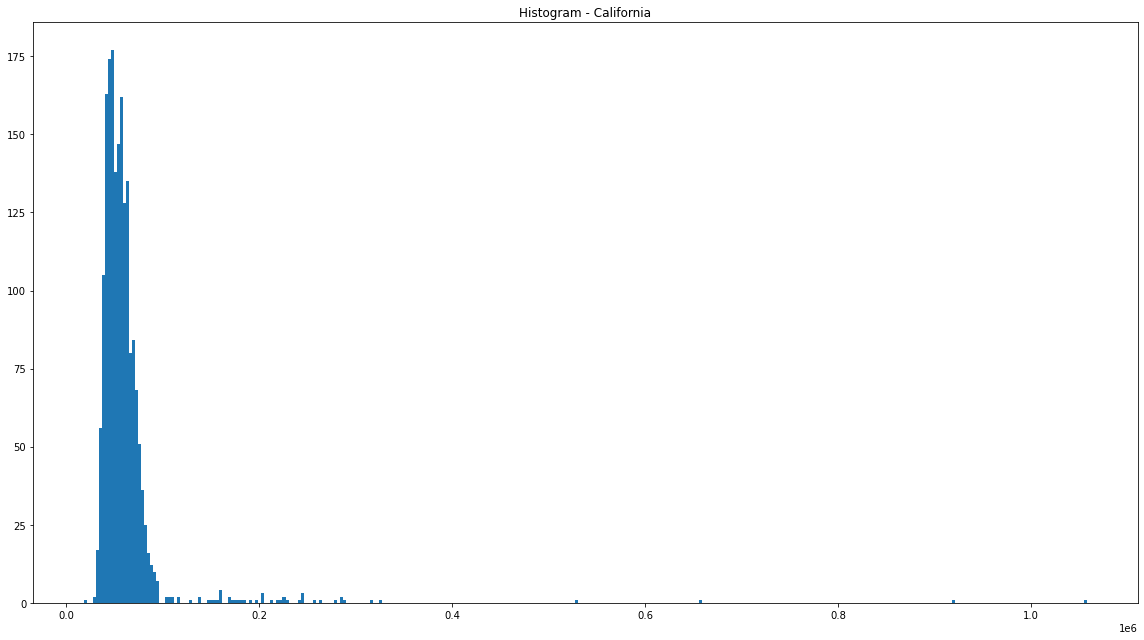

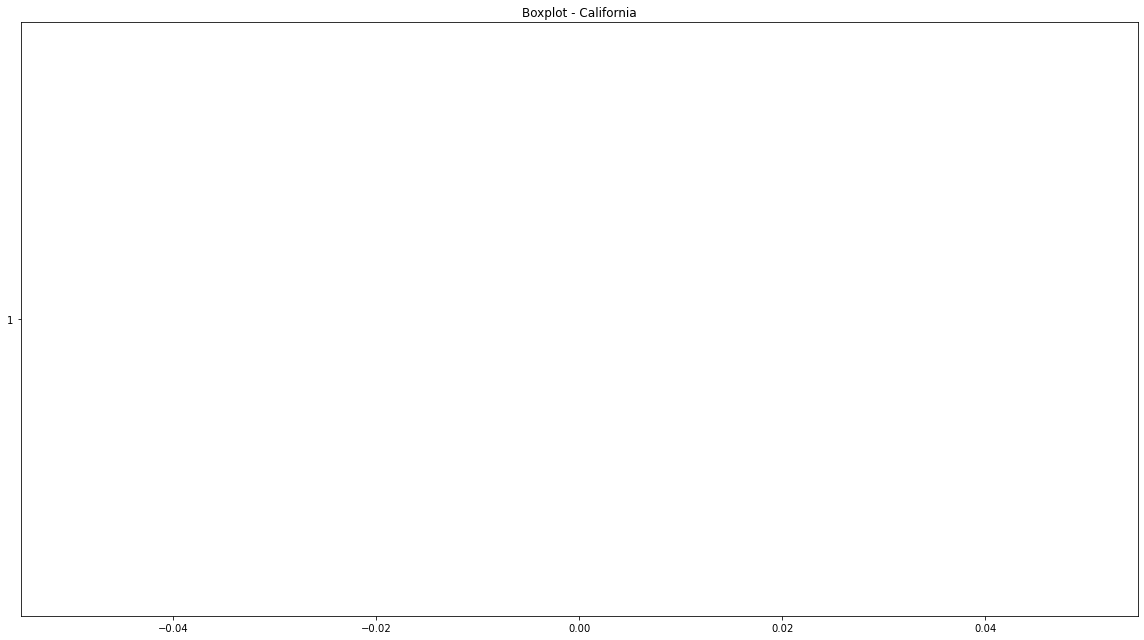

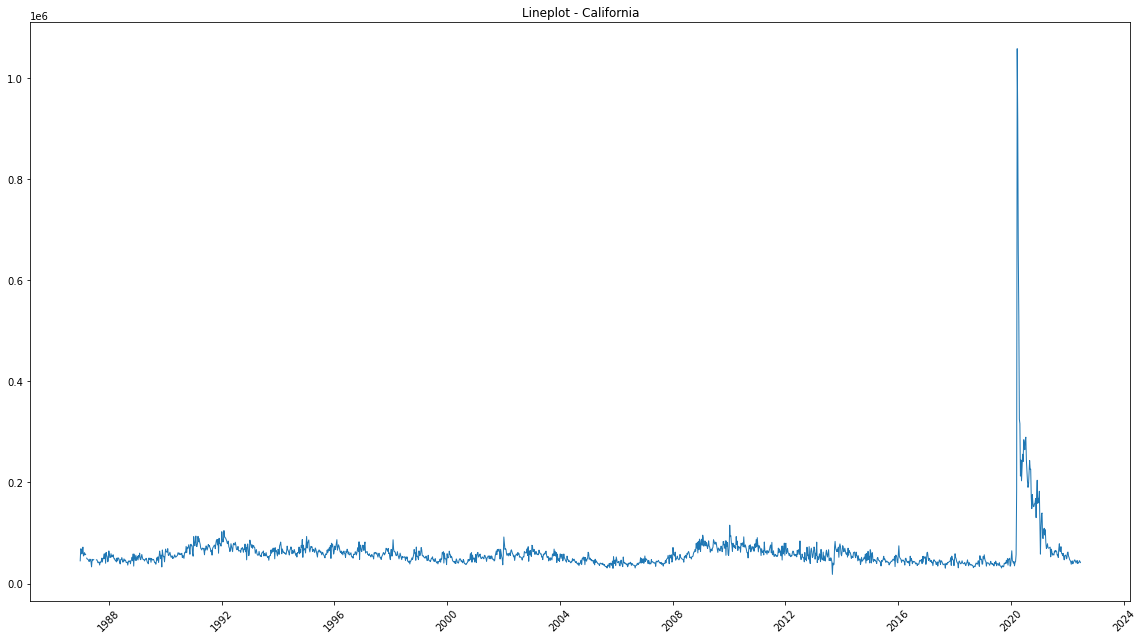

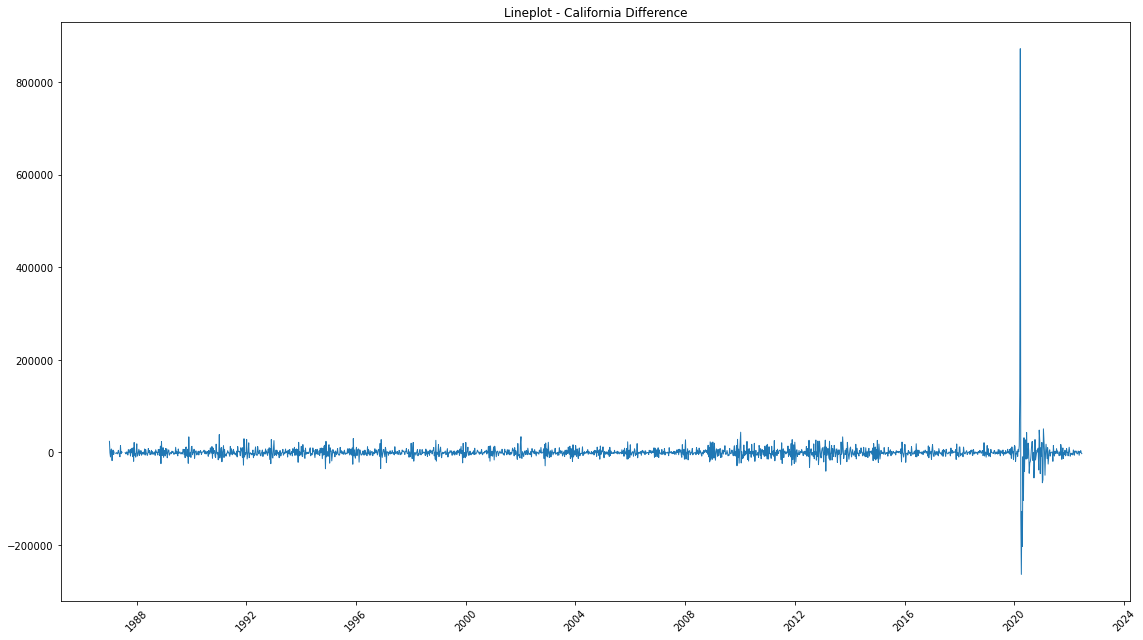

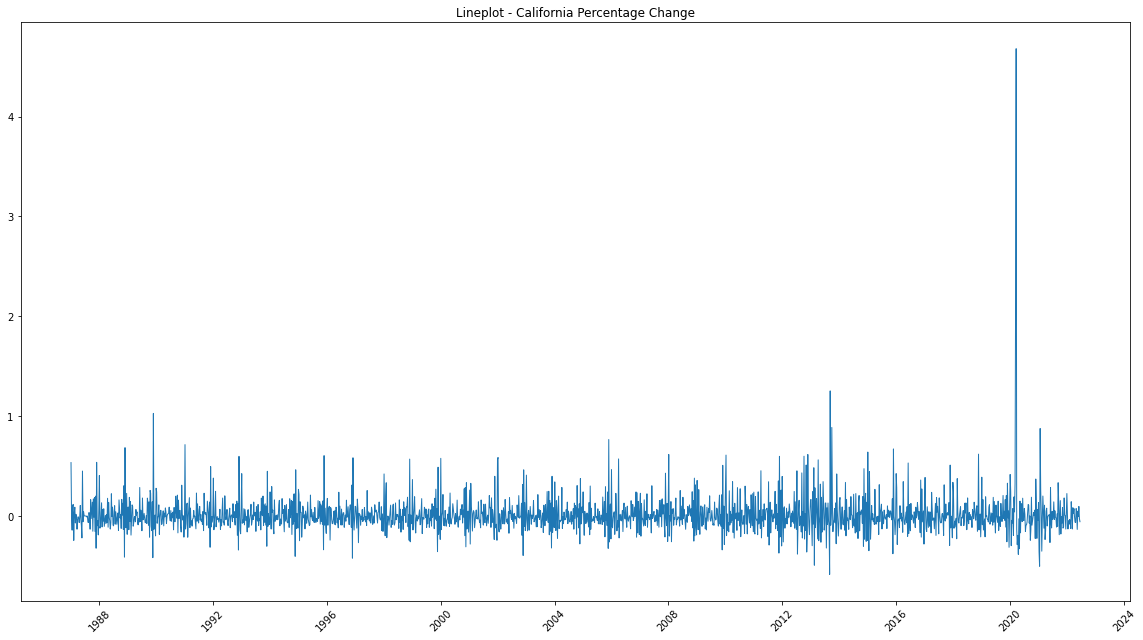

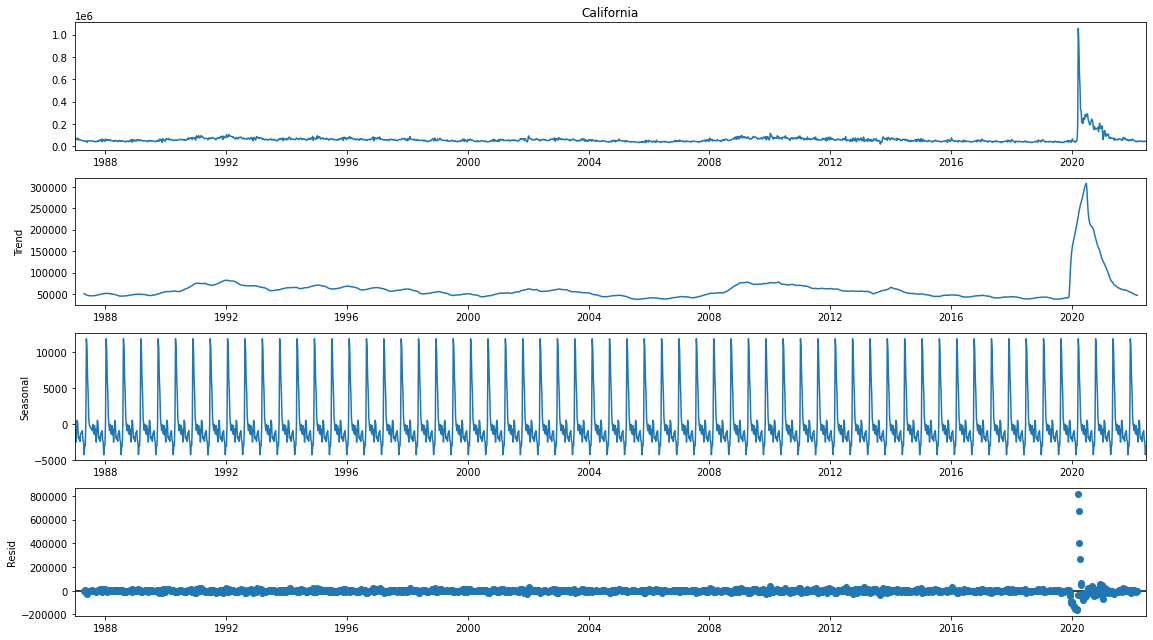

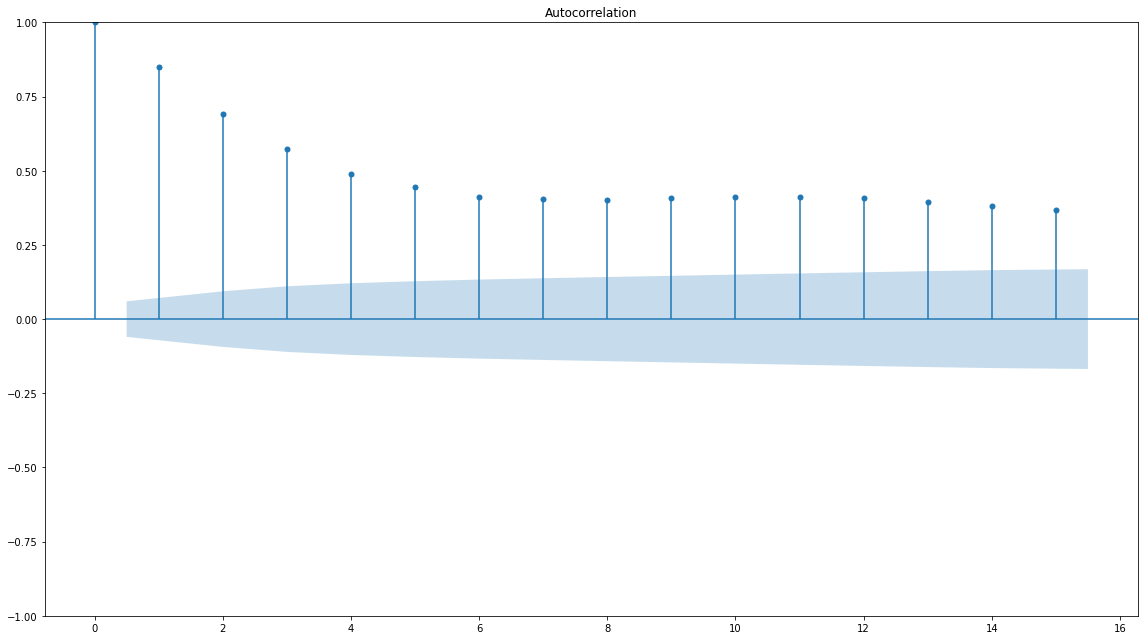

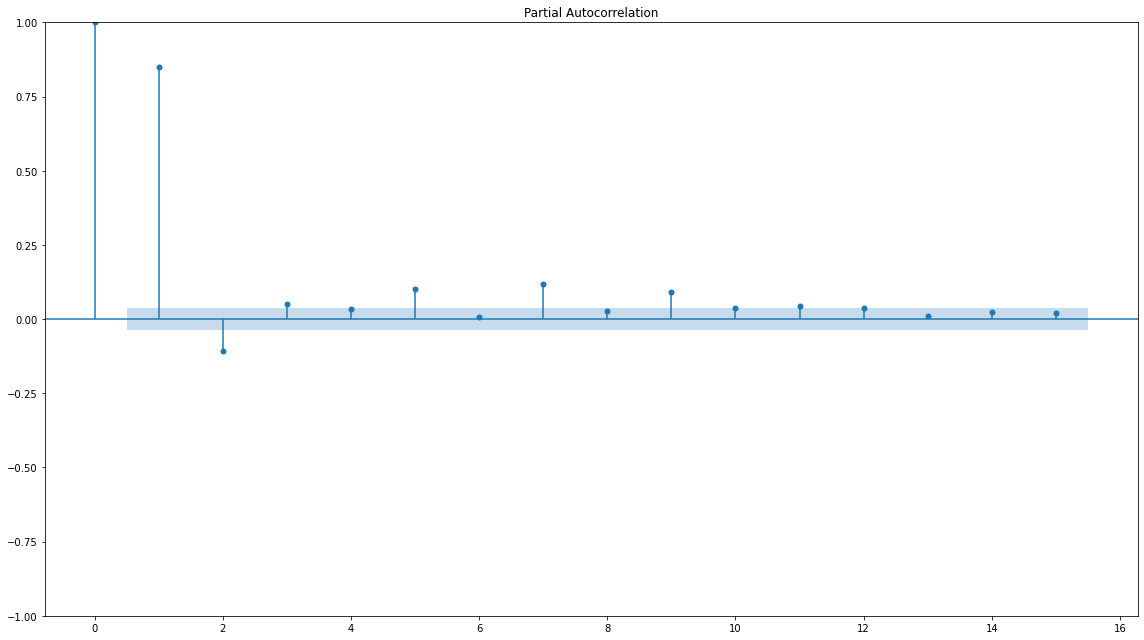

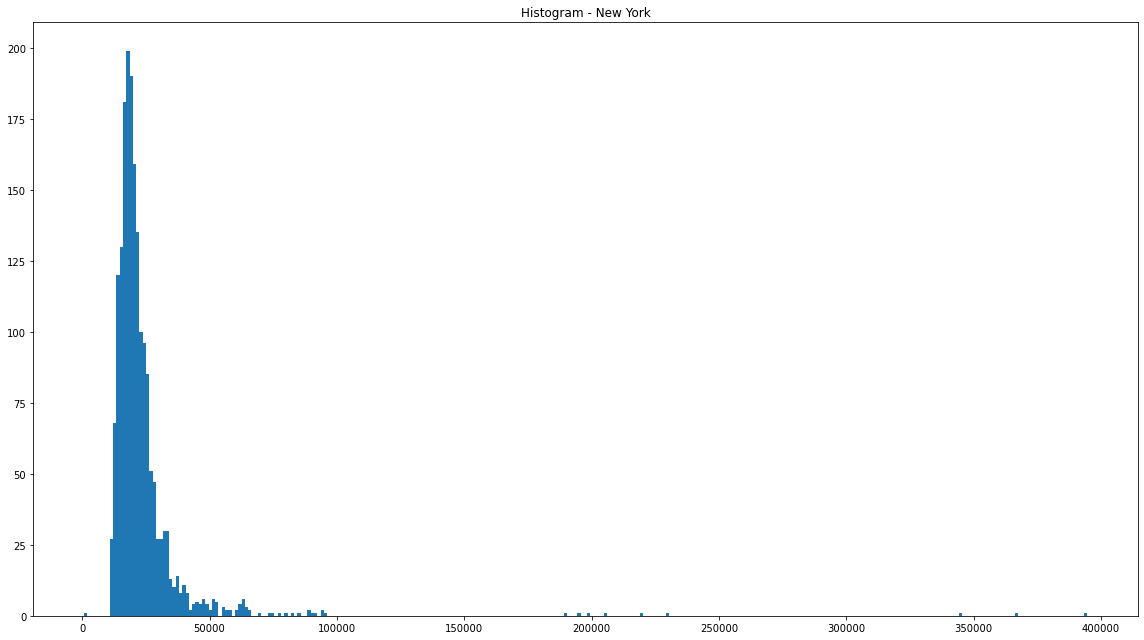

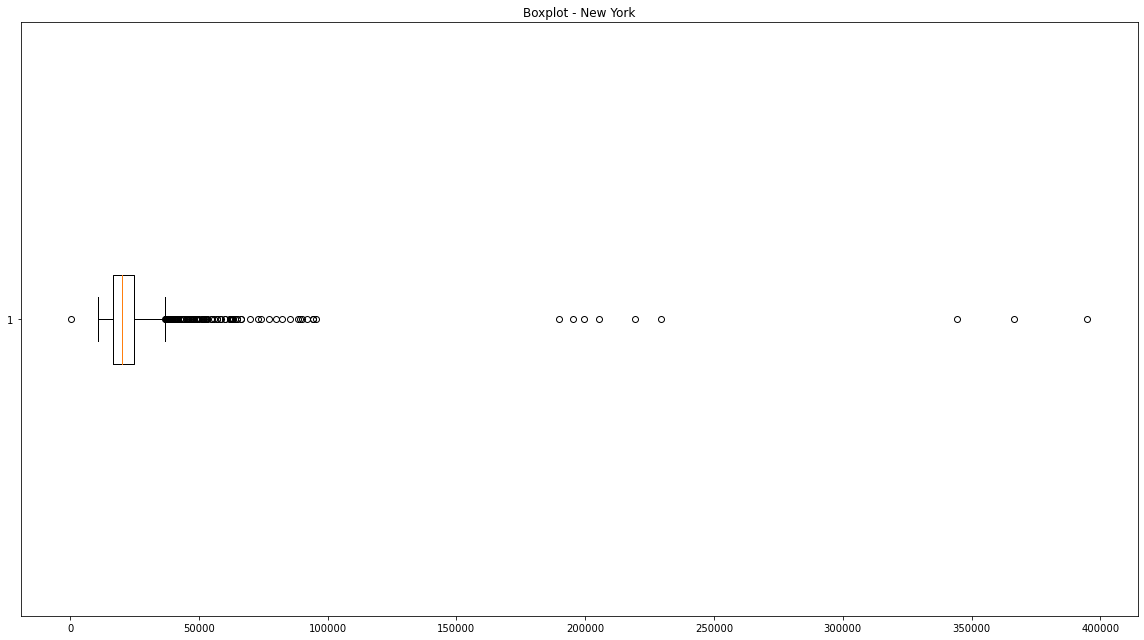

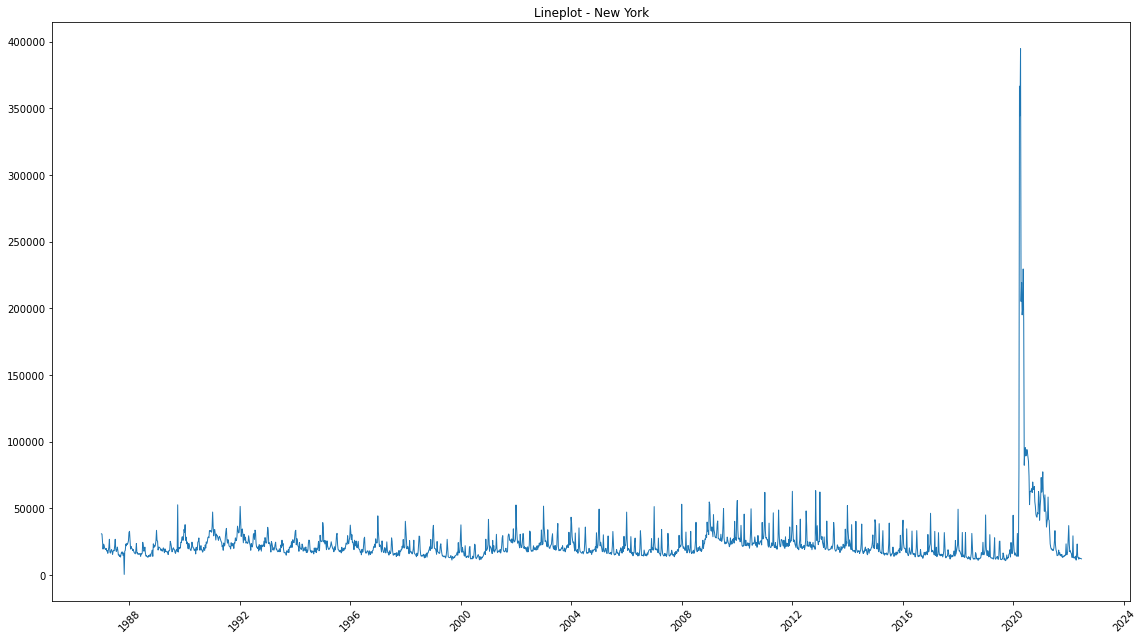

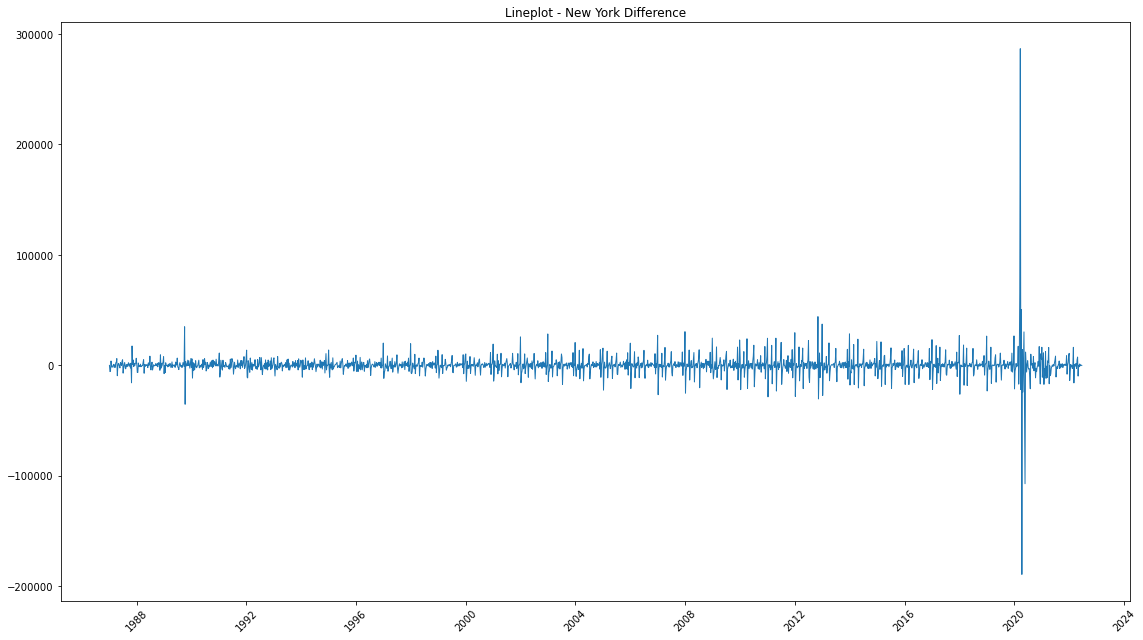

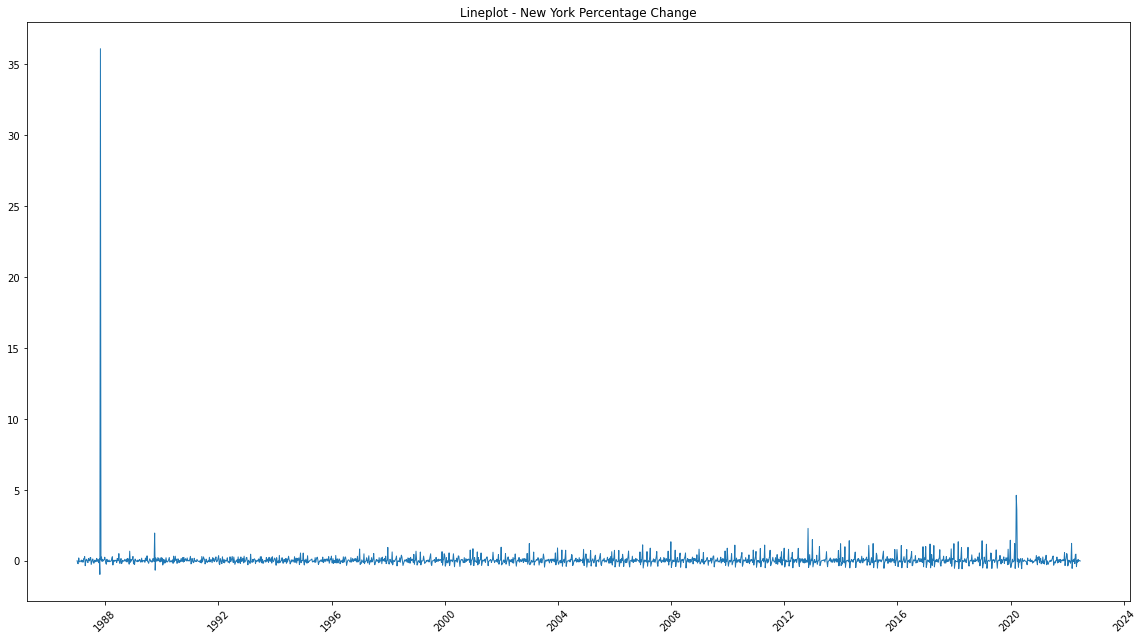

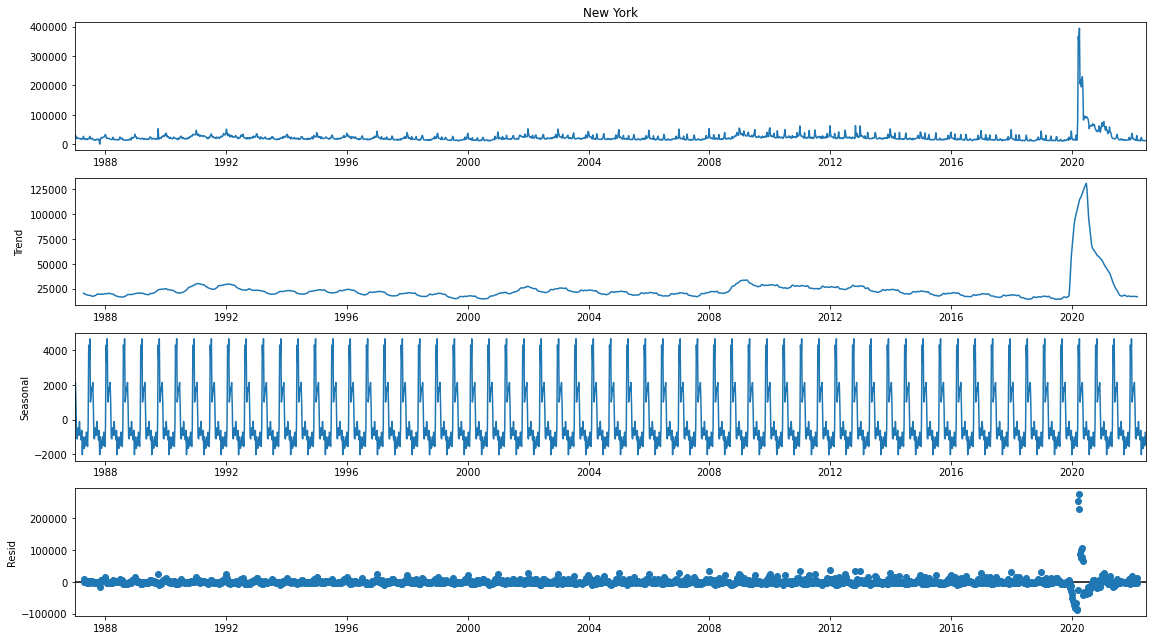

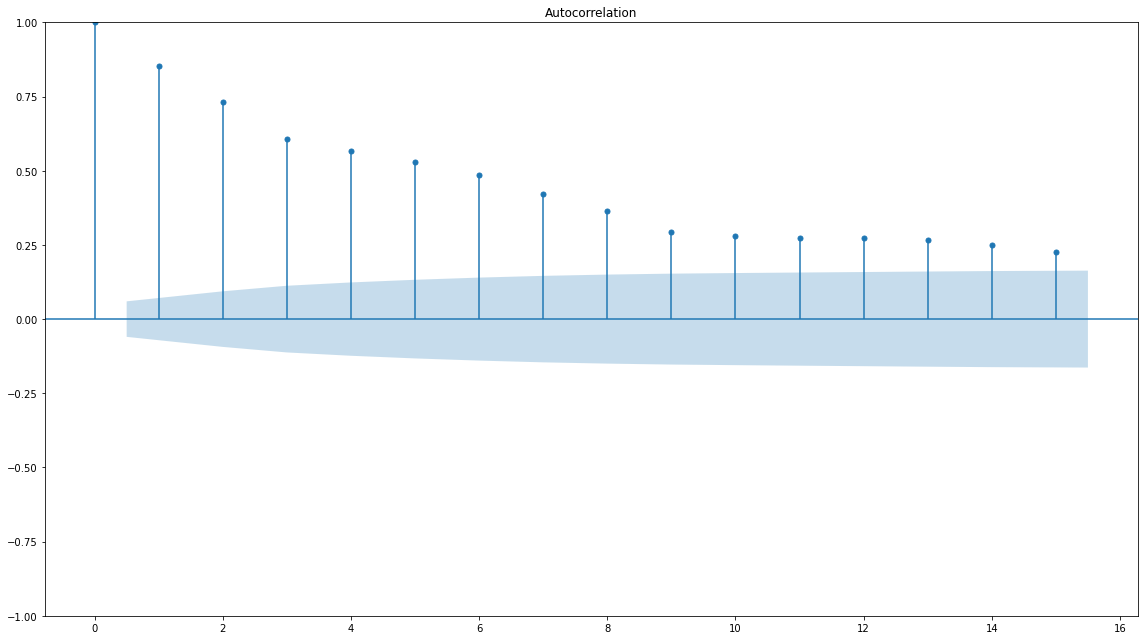

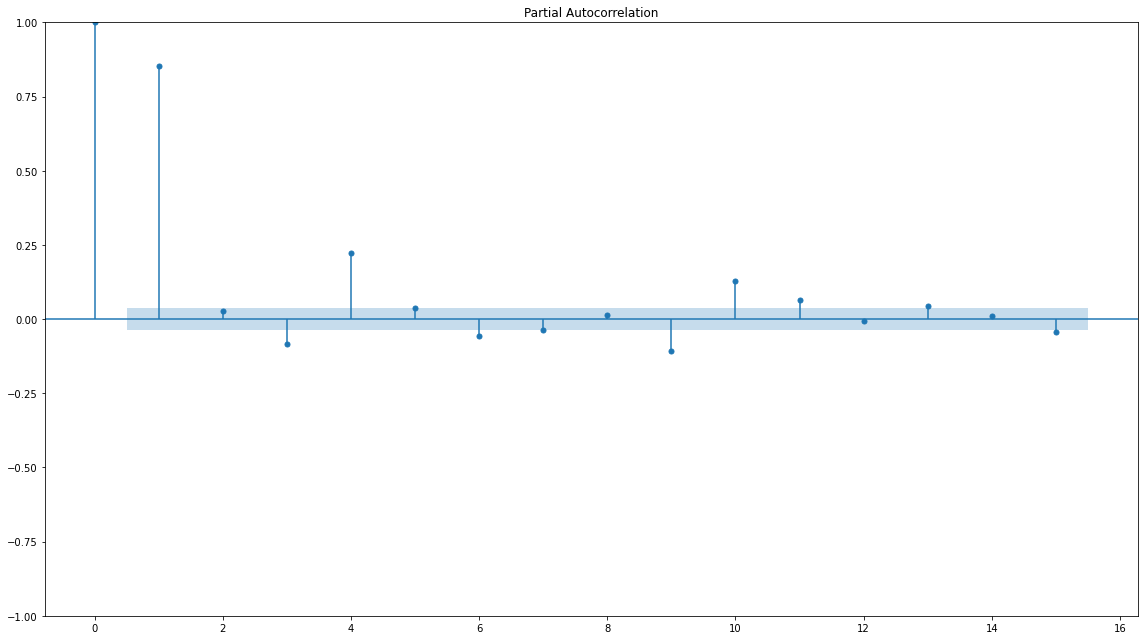

In [33]:
utils.eda_charts(ic[the_chosen_ones])